In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle


In [234]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
     

# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [235]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [236]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [237]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [238]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [239]:
# print last 5 rows of the dataframe
data_frame.sample()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
438,13.85,19.6,88.68,592.6,0.08684,0.0633,0.01342,0.02293,0.1555,0.05673,...,28.01,100.9,749.1,0.1118,0.1141,0.04753,0.0589,0.2513,0.06911,1


In [240]:
data_frame.shape

(569, 31)

In [241]:
# getting some information about the data
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [242]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [243]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [244]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [245]:
data_frame.dtypes # datatype of the coluumns

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [246]:
data_frame.columns # columns names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [247]:
len(data_frame.columns) # length of the columns

31

In [248]:
data_frame.shape # shape of the dataset

(569, 31)

In [249]:
df_num = data_frame.select_dtypes(exclude = 'object')
df_num.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [250]:
df_cat = data_frame.select_dtypes(include = 'object')
df_cat.head()

""
0
1
2
3
4


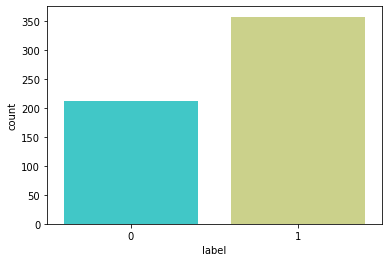

In [251]:
# countplot for the target column for checkin gthe distribution of target
sns.countplot(x='label', data=data_frame,palette ='rainbow')
plt.show()

In [252]:
data_frame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

Distribution of the variables


In [253]:
def distribution(i):
  mean = data_frame[i].mean()
  median = data_frame[i].median()
  mode = data_frame[i].mode()

  fig, ax_hist = plt.subplots(figsize = (10,5))
  ax_hist = sns.distplot(data_frame[i])

  ax_hist.axvline(mean, color = 'r', linestyle = '--', label = 'Mean')
  ax_hist.axvline(median, color = 'g', linestyle = '-', label = 'Median')
  ax_hist.axvline(mode[0], color = 'b', linestyle = '-', label = 'Mode')
  ax_hist.set_title(f'Central Tendency and Distribution of {i}')

  print(data_frame[i].skew())

  plt.show()







In [254]:
i = iter(data_frame.columns)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.9423795716730992


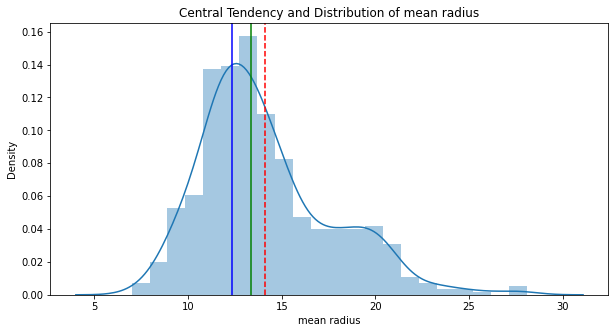

In [255]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.6504495420828159


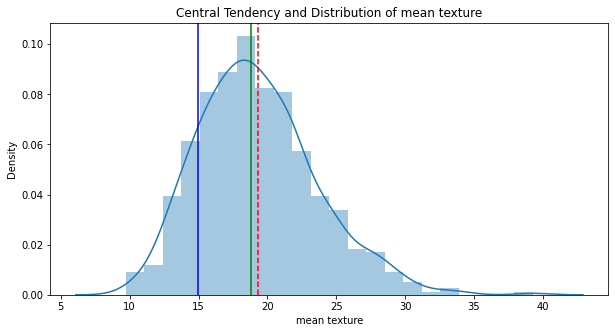

In [256]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.9906504253930081


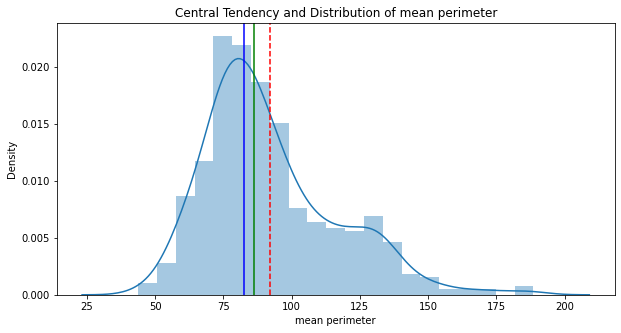

In [257]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.6457321756240424


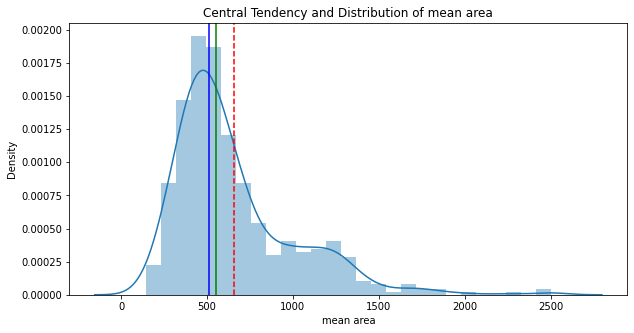

In [258]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.45632376481955844


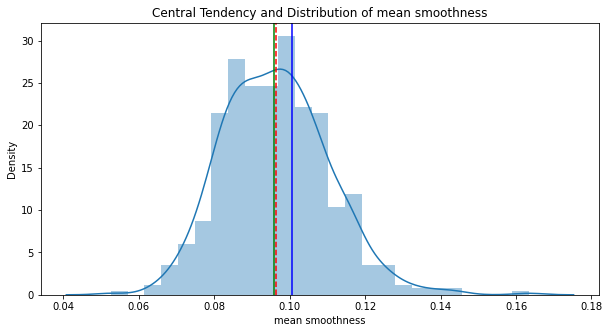

In [259]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.1901230311980404


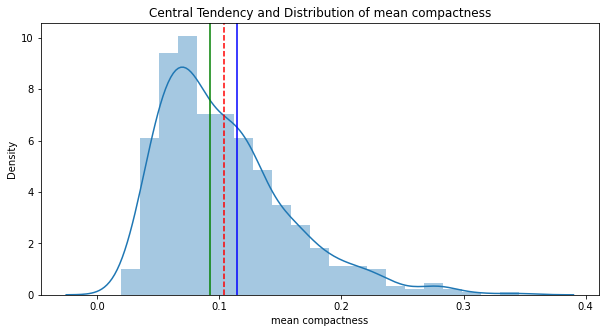

In [260]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.4011797389486722


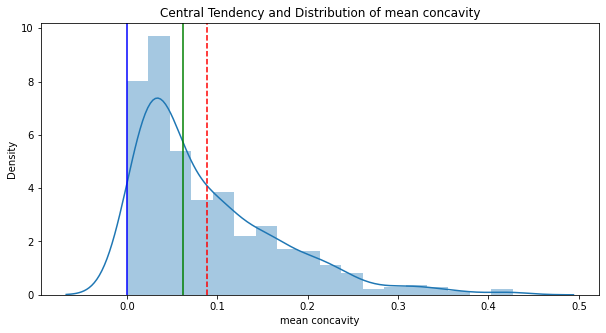

In [261]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.1711800812336282


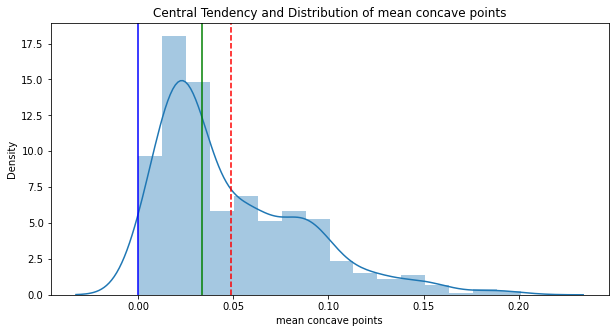

In [262]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.7256089733641999


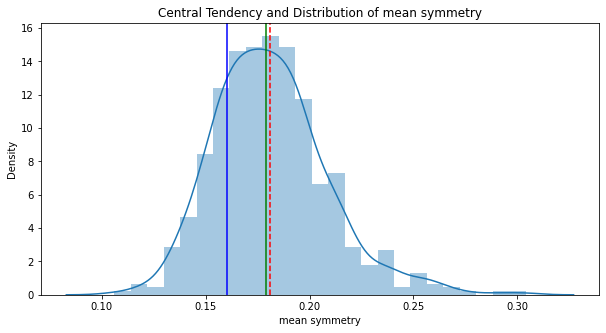

In [263]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.3044888125755076


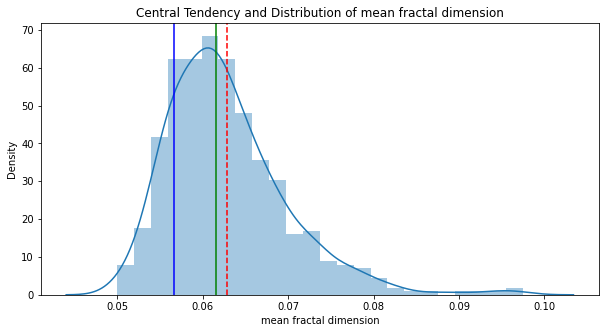

In [264]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.0886121663847574


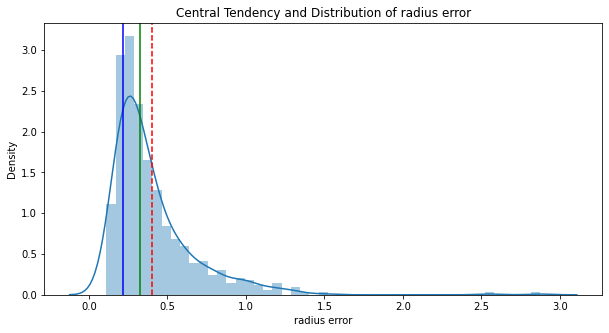

In [265]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.646443808753053


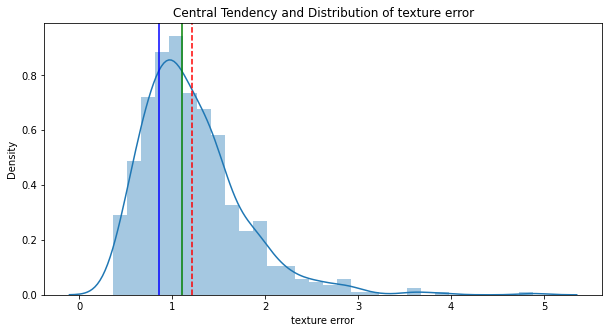

In [266]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.443615202194899


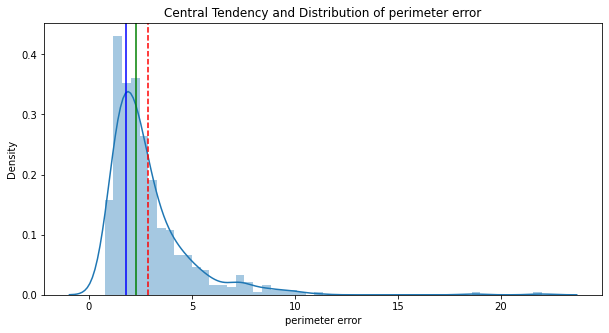

In [267]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5.447186284898394


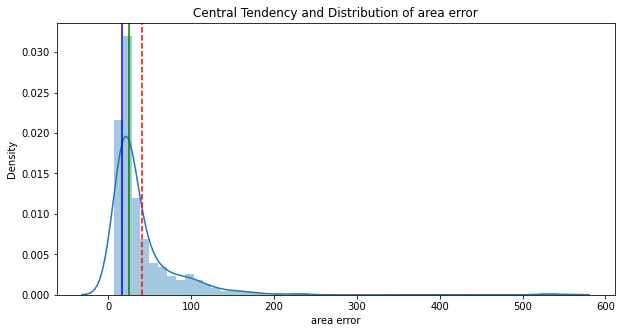

In [268]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.314450056636759


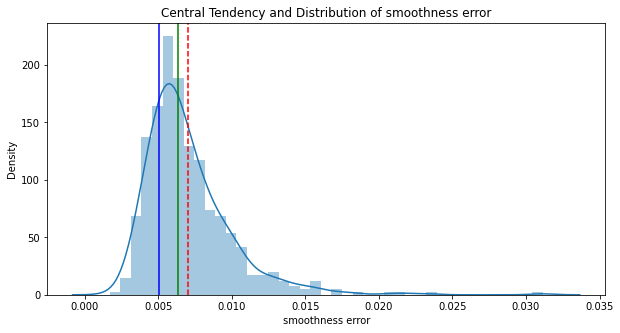

In [269]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.9022207096378565


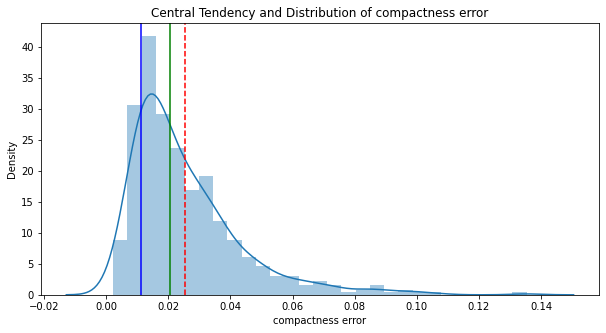

In [270]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5.110463049043661


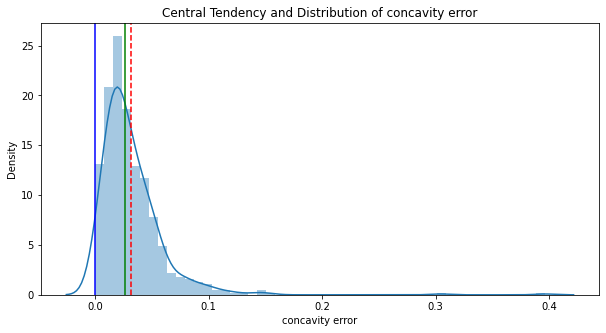

In [271]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.4446781446974786


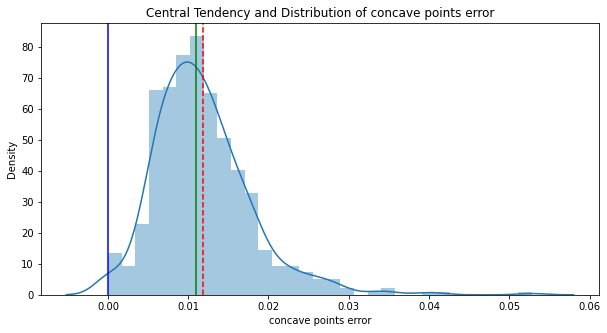

In [272]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.1951328995478216


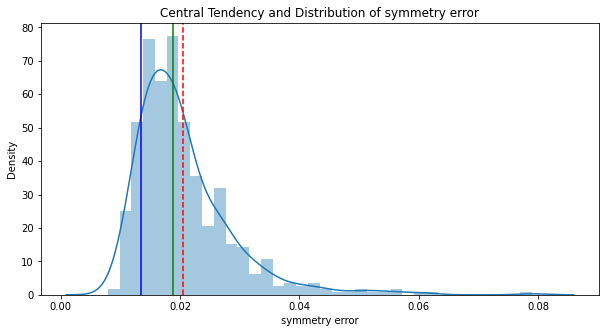

In [273]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.923968620227413


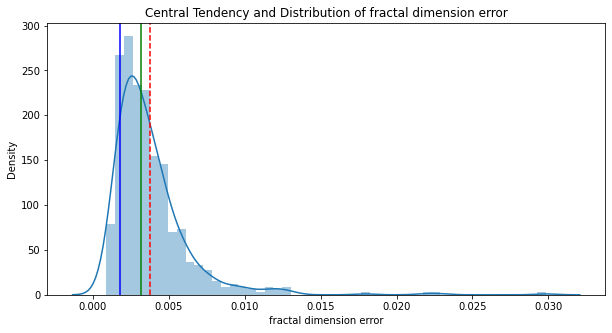

In [274]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.1031152059604372


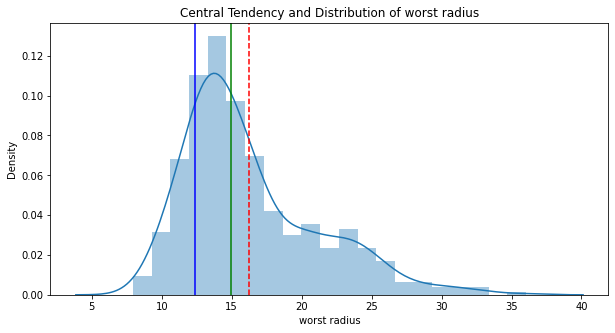

In [275]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.49832130948716474


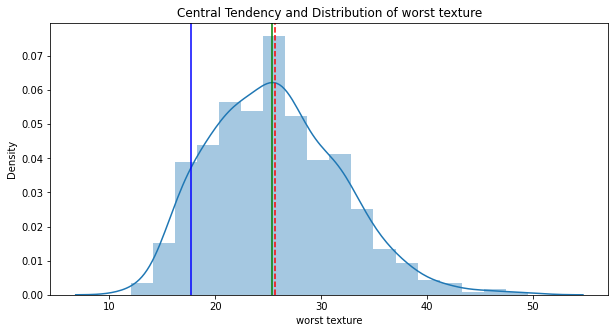

In [276]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.1281638713683722


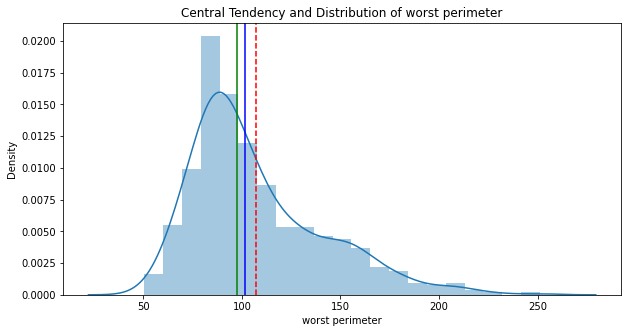

In [277]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.8593732724433467


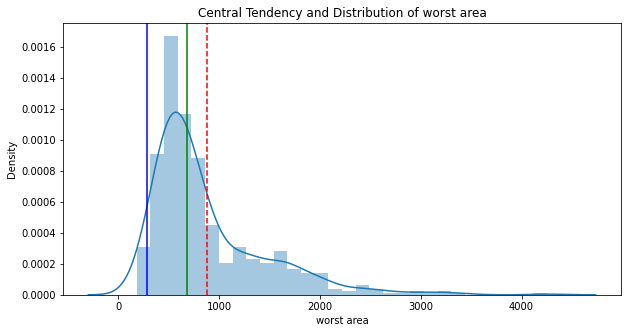

In [278]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.4154259962824678


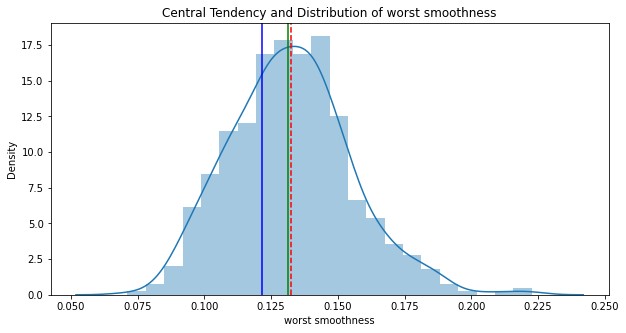

In [279]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.4735549003297956


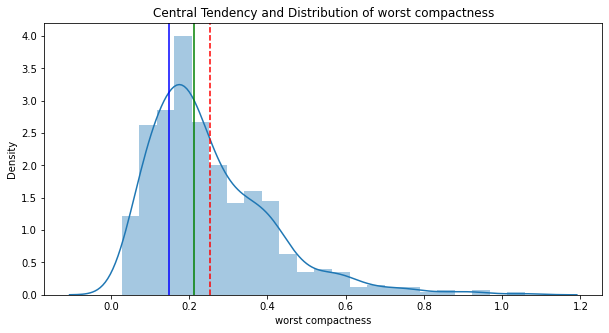

In [280]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.1502368219460262


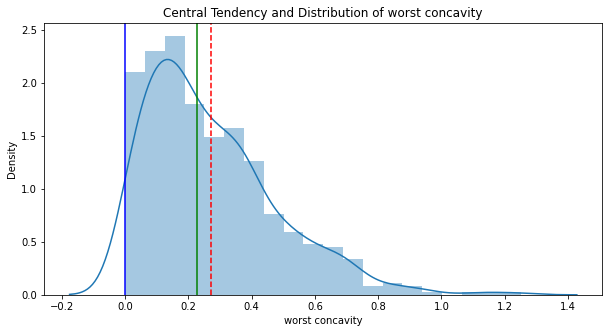

In [281]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.49261552688550875


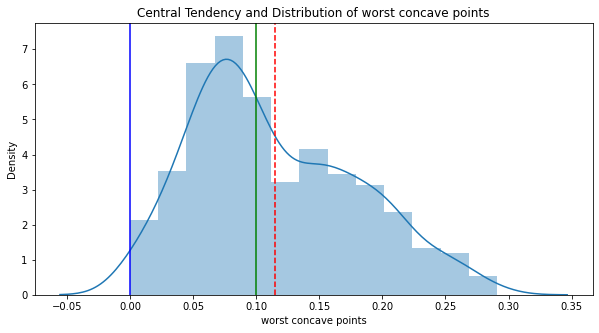

In [282]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.433927765189328


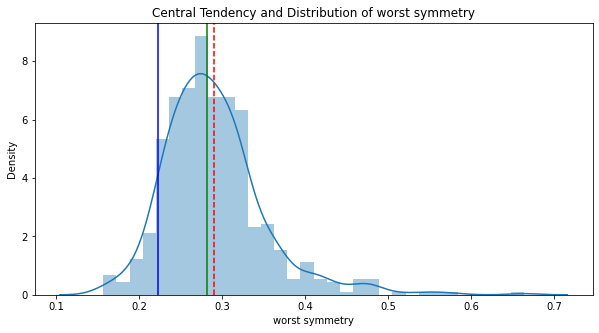

In [283]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.6625792663955146


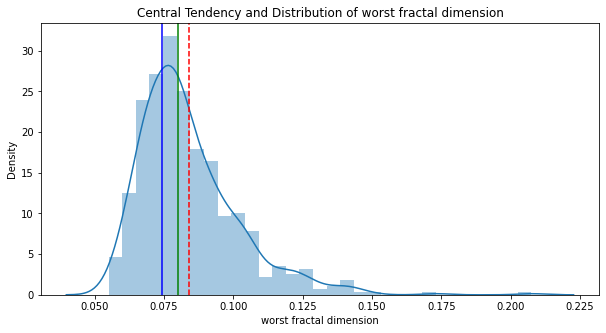

In [284]:
distribution(next(i))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.5284613207977967


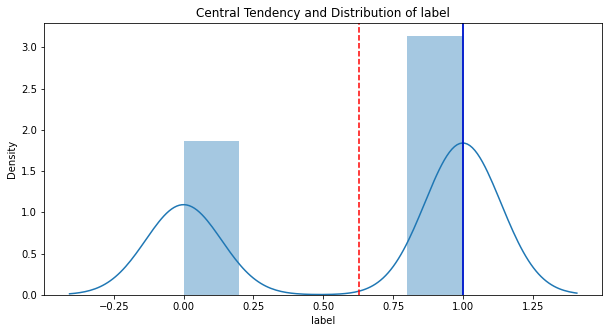

In [285]:
distribution(next(i))

Outliers in the variables

In [286]:
def outlier(i):
  # Outliers
  Q3 = data_frame[i].quantile(0.75)
  Q1 = data_frame[i].quantile(0.25)
  IQR = Q3 - Q1 
  display(data_frame.loc[(data_frame[i] < (Q1 - 1.5 * IQR)) | (data_frame[i] > (Q3 + 1.5 * IQR))])

  plt.figure(figsize = (10 , 5))
  sns.boxplot(data_frame[i], palette = 'rainbow').set_title(f'Outlier in {i}')

In [287]:
i = iter(data_frame.columns)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
82,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0
122,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,0
164,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,...,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,0
180,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,0
202,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,...,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,0
212,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,0
236,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,0.06309,...,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,0
339,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506,...,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738,0
352,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,0.06121,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


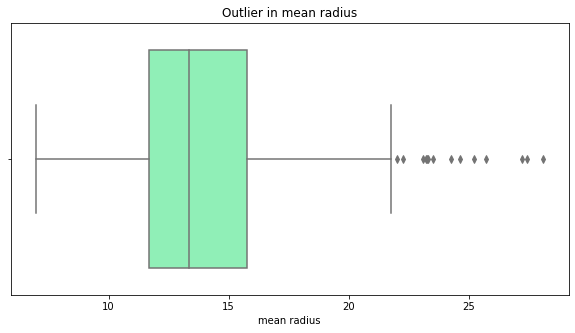

In [288]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
219,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,0.05313,...,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568,0
232,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307,1
239,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,0.1809,0.05966,...,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496,0
259,15.53,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,0.2091,0.06650,...,49.54,126.30,1035.0,0.18830,0.55640,0.57030,0.20140,0.3512,0.12040,0
265,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.086460,0.1769,0.05674,...,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218,0
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.032640,0.1375,0.06016,...,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.094290,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


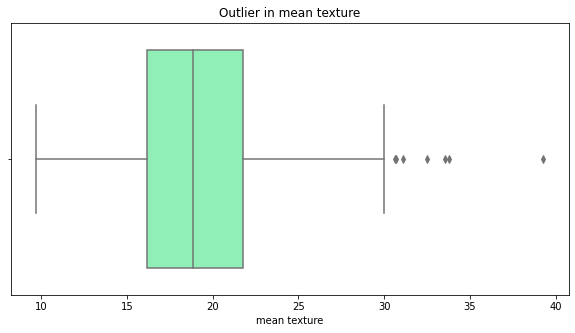

In [289]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
82,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0
122,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,0
164,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,...,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,0
180,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,0
202,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,...,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,0
212,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,0
236,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,0.06309,...,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,0
339,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506,...,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738,0
352,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,0.06121,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


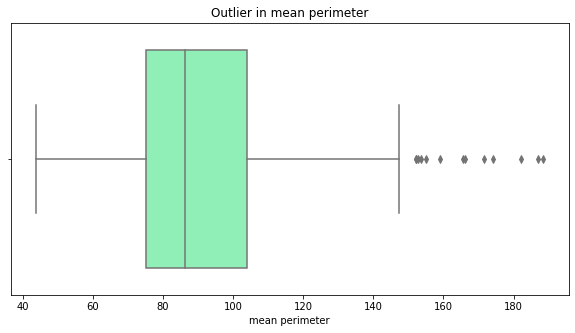

In [290]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
23,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,...,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,0
82,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0
122,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,0.06877,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,0
164,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,0.1801,0.05553,...,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,0
180,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,0
202,23.29,26.67,158.9,1685.0,0.11410,0.20840,0.3523,0.16200,0.2200,0.06229,...,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,0
212,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,0.05525,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,0
236,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,0.06309,...,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,0
250,20.94,23.56,138.9,1364.0,0.10070,0.16060,0.2712,0.13100,0.2205,0.05898,...,27.00,165.3,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


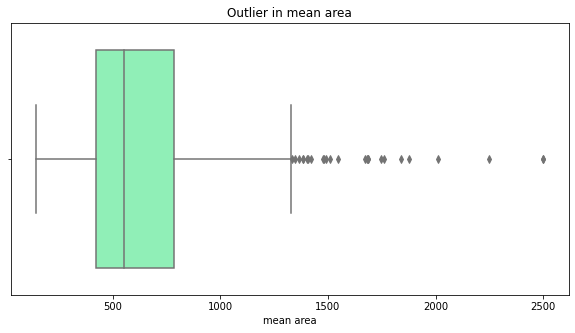

In [291]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
105,13.110,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.09601,0.1925,0.07692,...,22.40,106.40,827.2,0.18620,0.40990,0.63760,0.19860,0.3147,0.14050,0
122,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,0.06877,...,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009,0
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,16.38,69.05,300.2,0.19020,0.34410,0.20990,0.10250,0.3038,0.12520,1
520,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,0.07696,...,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982,1
568,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


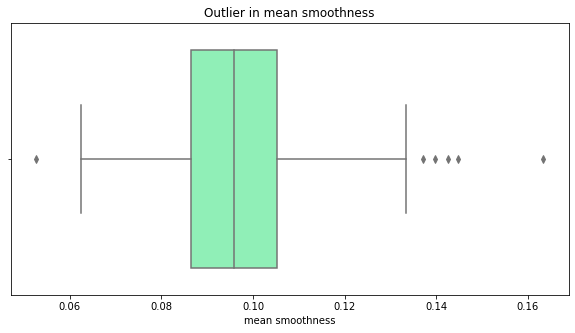

In [292]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
9,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0
12,19.17,24.80,132.40,1123.0,0.0974,0.2458,0.2065,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230,0
14,13.73,22.61,93.60,578.3,0.1131,0.2293,0.2128,0.08025,0.2069,0.07682,...,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310,0
78,20.18,23.97,143.70,1245.0,0.1286,0.3454,0.3754,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964,0
82,25.22,24.91,171.50,1878.0,0.1063,0.2665,0.3339,0.18450,0.1829,0.06782,...,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.27,19.67,152.80,1509.0,0.1326,0.2768,0.4264,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0
122,24.25,20.20,166.20,1761.0,0.1447,0.2867,0.4268,0.20120,0.2655,0.06877,...,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,0
181,21.09,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.14960,0.2395,0.07398,...,33.48,176.50,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


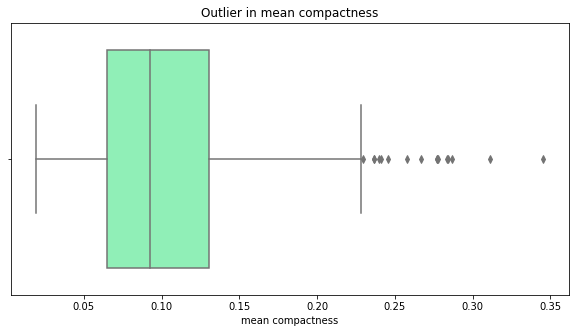

In [293]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.990,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890,0
68,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750,1
78,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.3754,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.2508,0.5440,0.09964,0
82,25.220,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,...,33.62,211.70,2562.0,0.15730,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.2910,0.4055,0.09789,0
112,14.260,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,...,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820,1
122,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,...,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.2248,0.3222,0.08009,0
152,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,0.09296,...,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590,1
180,27.220,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,...,32.85,220.80,3216.0,0.14720,0.4034,0.5340,0.2688,0.2856,0.08082,0
202,23.290,26.67,158.90,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,...,32.68,177.00,1986.0,0.15360,0.4167,0.7892,0.2733,0.3198,0.08762,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


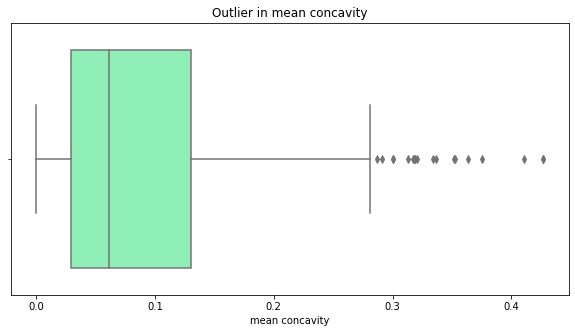

In [294]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
78,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,0.2906,0.08142,...,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964,0
82,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,0.06782,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0
122,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,0.2655,0.06877,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,0
180,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,0.05770,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,0
202,23.29,26.67,158.9,1685.0,0.1141,0.2084,0.3523,0.1620,0.2200,0.06229,...,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,0
212,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,0
352,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,0.06121,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,0
393,21.61,22.28,144.4,1407.0,0.1167,0.2087,0.2810,0.1562,0.2162,0.06606,...,28.74,172.0,2081.0,0.1502,0.5717,0.7053,0.2422,0.3828,0.10070,0
461,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,0.05623,...,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


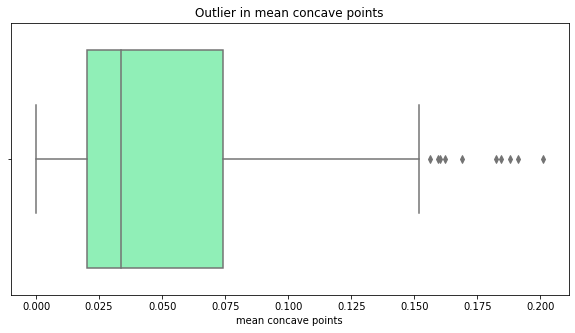

In [295]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
22,15.340,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.09756,0.2521,0.07032,...,19.08,125.10,980.9,0.13900,0.59540,0.63050,0.23930,0.4667,0.09946,0
25,17.140,16.40,116.00,912.7,0.11860,0.22760,0.222900,0.14010,0.3040,0.07413,...,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590,0
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.01290,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1
78,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.375400,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964,0
108,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789,0
122,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.20120,0.2655,0.06877,...,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009,0
146,11.800,16.58,78.99,432.0,0.10910,0.17000,0.165900,0.07415,0.2678,0.07371,...,26.38,91.93,591.7,0.13850,0.40920,0.45040,0.18650,0.5774,0.10300,0
150,13.000,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.02645,0.2540,0.06087,...,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435,1
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.410800,0.07857,0.2548,0.09296,...,19.49,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


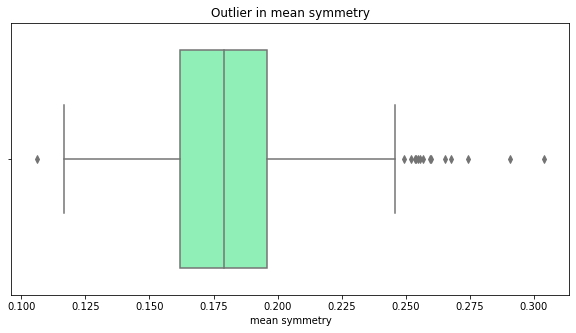

In [296]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
3,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
9,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0
68,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.17500,0.4228,0.11750,1
71,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.10840,1
78,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.37540,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.25080,0.5440,0.09964,0
151,8.219,20.70,53.27,203.9,0.09405,0.1305,0.13210,0.02168,0.2222,0.08261,...,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.14860,1
152,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,0.2548,0.09296,...,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.15710,0.3108,0.12590,1
176,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,0.1669,0.08116,...,24.39,73.07,390.2,0.1301,0.2950,0.3486,0.09910,0.2614,0.11620,1
258,15.660,23.20,110.20,773.5,0.11090,0.3114,0.31760,0.13770,0.2495,0.08104,...,31.64,143.70,1226.0,0.1504,0.5172,0.6181,0.24620,0.3277,0.10190,0
318,9.042,18.90,60.07,244.5,0.09968,0.1972,0.19750,0.04908,0.2330,0.08743,...,23.40,68.62,297.1,0.1221,0.3748,0.4609,0.11450,0.3135,0.10550,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


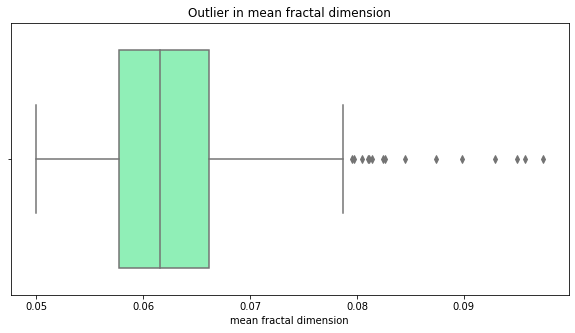

In [297]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
12,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230,0
25,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,...,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590,0
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421,0
38,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0
42,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380,0
77,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673,...,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964,0
82,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,0.06782,...,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510,0
108,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


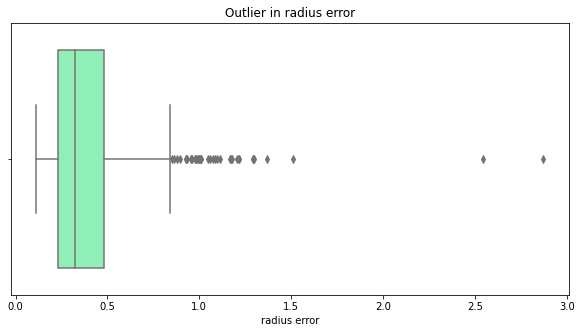

In [298]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
12,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230,0
83,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203,0
122,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,0.06877,...,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009,0
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.1339,0.05945,...,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343,1
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,0.09296,...,19.49,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590,1
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559,1
245,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,...,29.46,73.68,402.8,0.15150,0.10260,0.11810,0.06736,0.2883,0.07748,1
258,15.660,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,0.08104,...,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190,0
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,...,22.44,56.65,240.1,0.13470,0.07767,0.00000,0.00000,0.3142,0.08116,1
345,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


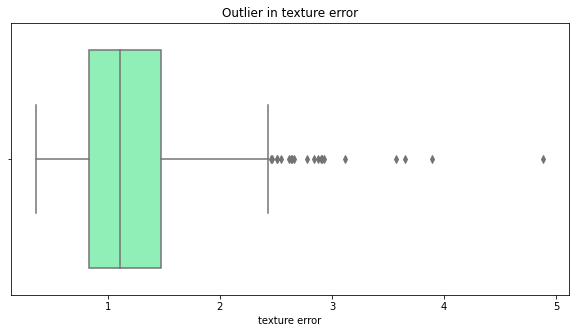

In [299]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
12,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230,0
25,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,0.07413,...,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590,0
38,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0
42,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380,0
77,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673,...,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964,0
82,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,0.06782,...,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510,0
108,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789,0
122,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,0.06877,...,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


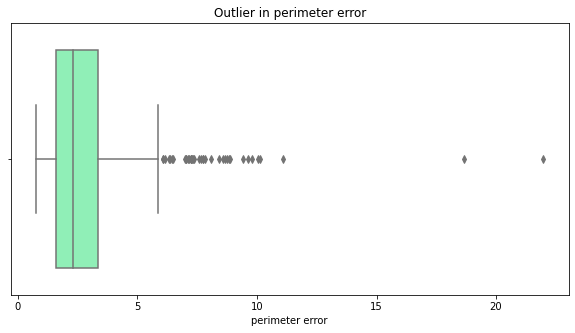

In [300]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
2,19.69,21.25,130.0,1203.0,0.10960,0.1599,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
4,20.29,14.34,135.1,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
12,19.17,24.80,132.4,1123.0,0.09740,0.2458,0.2065,0.11180,0.2397,0.07800,...,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230,0
18,19.81,22.15,130.0,1260.0,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,...,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,20.55,20.86,137.8,1308.0,0.10460,0.1739,0.2085,0.13220,0.2127,0.06251,...,25.48,160.2,1809.0,0.1268,0.3135,0.4433,0.2148,0.3077,0.07569,0
563,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.3174,0.14740,0.2149,0.06879,...,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.0,1479.0,0.11100,0.1159,0.2439,0.13890,0.1726,0.05623,...,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.1440,0.09791,0.1752,0.05533,...,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


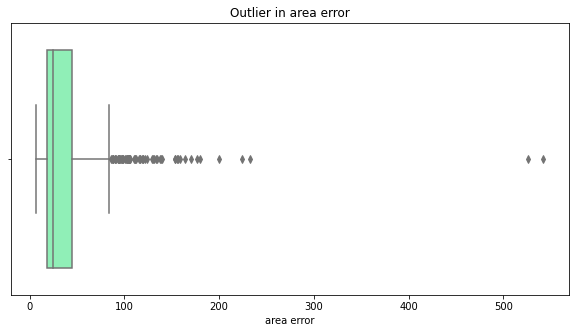

In [301]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.086060,0.028720,0.1902,0.08980,...,15.67,62.56,284.4,0.1207,0.24360,0.14340,0.04786,0.2254,0.10840,1
76,13.530,10.94,87.91,559.2,0.12910,0.10470,0.068770,0.065560,0.2403,0.06641,...,12.49,91.36,605.5,0.1451,0.13790,0.08539,0.07407,0.2710,0.07191,1
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.017780,0.1584,0.07065,...,21.47,71.68,367.0,0.1467,0.17650,0.13000,0.05334,0.2533,0.08468,1
111,12.630,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,0.1735,0.07070,...,25.47,89.00,527.4,0.1287,0.22500,0.22160,0.11050,0.2226,0.08486,1
116,8.950,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722,1
122,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,0.2655,0.06877,...,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009,0
173,11.080,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.025830,0.1566,0.06669,...,16.82,72.01,396.5,0.1216,0.08240,0.03938,0.04306,0.1902,0.07313,1
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.130700,0.037160,0.1669,0.08116,...,24.39,73.07,390.2,0.1301,0.29500,0.34860,0.09910,0.2614,0.11620,1
185,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,...,21.18,75.39,437.0,0.1521,0.10190,0.00692,0.01042,0.2933,0.07697,1
196,13.770,22.29,90.63,588.9,0.12000,0.12670,0.138500,0.065260,0.1834,0.06877,...,34.01,111.60,806.9,0.1737,0.31220,0.38090,0.16730,0.3080,0.09333,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


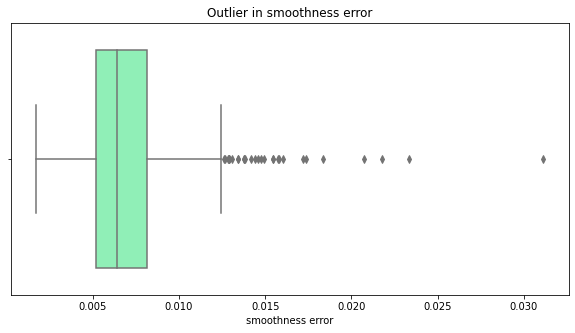

In [302]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
3,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,0
9,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.0580,1.1050,0.22100,0.4366,0.20750,0
12,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230,0
42,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380,0
62,14.250,22.15,96.42,645.7,0.10490,0.2008,0.21350,0.08653,0.1949,0.07292,...,29.51,119.10,959.5,0.16400,0.6247,0.6922,0.17850,0.2844,0.11320,0
68,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750,1
71,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840,1
78,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.37540,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964,0
108,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.42640,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.29100,0.4055,0.09789,0
112,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,0.07769,...,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


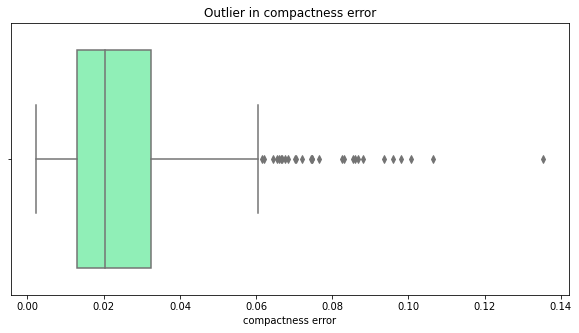

In [303]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
12,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230,0
42,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380,0
68,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750,1
78,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.37540,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964,0
108,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.42640,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.29100,0.4055,0.09789,0
112,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,0.07769,...,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820,1
116,8.950,15.76,58.74,245.2,0.09462,0.1243,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.11790,0.1879,0.1544,0.03846,0.1652,0.07722,1
122,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.42680,0.20120,0.2655,0.06877,...,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009,0
152,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,0.2548,0.09296,...,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590,1
176,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,0.1669,0.08116,...,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


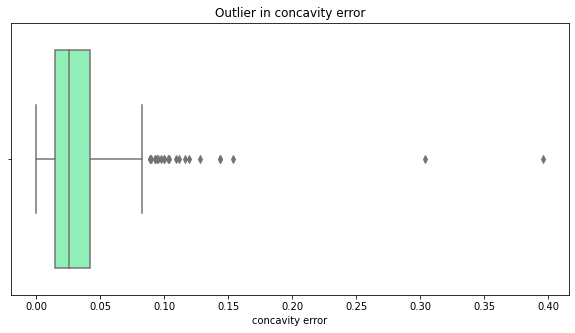

In [304]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
12,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230,0
42,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380,0
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750,1
78,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,...,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964,0
138,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,...,21.43,121.40,971.4,0.14110,0.2164,0.3355,0.16670,0.3414,0.07147,0
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,0.09296,...,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590,1
161,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,17.81,146.60,1495.0,0.11240,0.2016,0.2264,0.17770,0.2443,0.06251,0
210,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,27.84,158.30,1656.0,0.11780,0.2920,0.3861,0.19200,0.2909,0.05865,0
213,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.10990,0.1603,0.06818,0
258,15.660,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,0.08104,...,31.64,143.70,1226.0,0.15040,0.5172,0.6181,0.24620,0.3277,0.10190,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


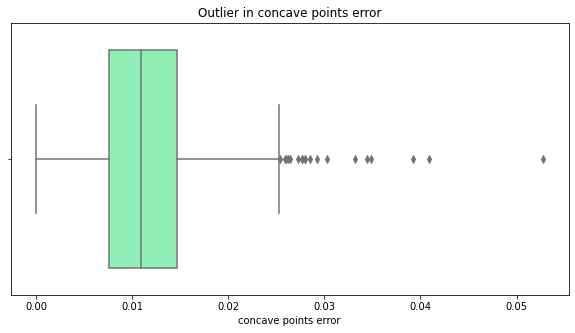

In [305]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
12,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.206500,0.111800,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230,0
22,15.340,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.097560,0.2521,0.07032,...,19.08,125.10,980.9,0.13900,0.59540,0.63050,0.23930,0.4667,0.09946,0
42,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.210700,0.099610,0.2310,0.06343,...,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380,0
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,0.2743,0.06960,...,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,1
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.021800,0.2341,0.06963,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,1
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,1
78,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.375400,0.160400,0.2906,0.08142,...,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964,0
119,17.950,20.01,114.20,982.0,0.08402,0.06722,0.072930,0.055960,0.2129,0.05025,...,27.83,129.20,1261.0,0.10720,0.12020,0.22490,0.11850,0.4882,0.06111,0
122,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,0.2655,0.06877,...,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


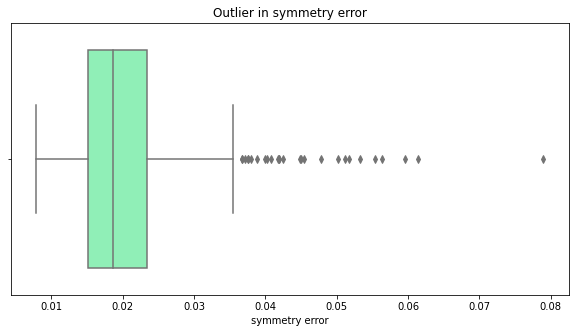

In [306]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
3,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,0
9,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.0580,1.1050,0.22100,0.4366,0.20750,0
12,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,0.07800,...,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230,0
14,13.730,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.2069,0.07682,...,32.01,108.80,697.7,0.16510,0.7725,0.6943,0.22080,0.3596,0.14310,0
68,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750,1
71,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840,1
83,19.100,26.29,129.10,1132.0,0.12150,0.1791,0.19370,0.14690,0.1634,0.07224,...,32.72,141.30,1298.0,0.13920,0.2817,0.2432,0.18410,0.2311,0.09203,0
112,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,0.07769,...,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820,1
122,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.42680,0.20120,0.2655,0.06877,...,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009,0
145,11.900,14.65,78.11,432.8,0.11520,0.1296,0.03710,0.03003,0.1995,0.07839,...,16.51,86.26,509.6,0.14240,0.2517,0.0942,0.06042,0.2727,0.10360,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


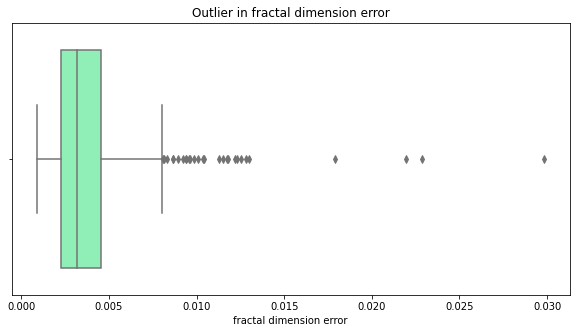

In [307]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
23,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,...,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,0
82,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0
164,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,0.1801,0.05553,...,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,0
180,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,0
212,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,0.05525,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,0
219,19.53,32.47,128.0,1223.0,0.08420,0.11300,0.1145,0.06637,0.1428,0.05313,...,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568,0
236,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,0.06309,...,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,0
265,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,0.05674,...,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218,0
272,21.75,20.99,147.3,1491.0,0.09401,0.19610,0.2195,0.10880,0.1721,0.06194,...,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


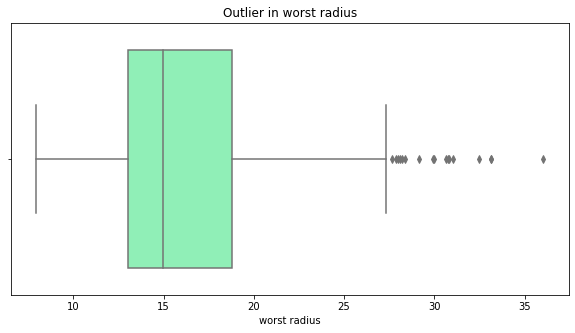

In [308]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
219,19.53,32.47,128.0,1223.0,0.08420,0.1130,0.1145,0.06637,0.1428,0.05313,...,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568,0
239,17.46,39.28,113.4,920.6,0.09812,0.1298,0.1417,0.08811,0.1809,0.05966,...,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496,0
259,15.53,33.56,103.7,744.9,0.10630,0.1639,0.1751,0.08399,0.2091,0.06650,...,49.54,126.3,1035.0,0.1883,0.5564,0.5703,0.2014,0.3512,0.12040,0
265,20.73,31.12,135.7,1419.0,0.09469,0.1143,0.1367,0.08646,0.1769,0.05674,...,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218,0
562,15.22,30.62,103.4,716.9,0.10480,0.2087,0.2550,0.09429,0.2128,0.07152,...,42.79,128.7,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.14090,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


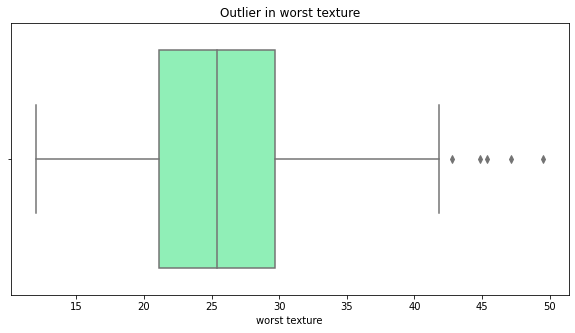

In [309]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
23,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,...,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,0
82,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0
180,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,0
212,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,0.05525,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,0
236,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,0.06309,...,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,0
265,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,0.05674,...,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218,0
272,21.75,20.99,147.3,1491.0,0.09401,0.19610,0.2195,0.10880,0.1721,0.06194,...,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858,0
339,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,0.1797,0.05506,...,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738,0
352,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,0.1956,0.06121,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


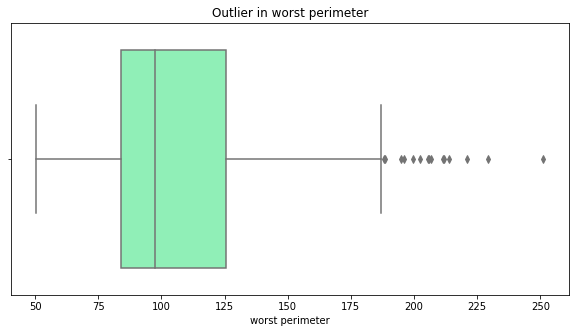

In [310]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
18,19.81,22.15,130.0,1260.0,0.09831,0.10270,0.1479,0.09498,0.1582,0.05395,...,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615,0
23,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,...,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,0
24,16.65,21.38,110.0,904.6,0.11210,0.14570,0.1525,0.09170,0.1995,0.06330,...,31.56,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564,0
56,19.21,18.57,125.5,1152.0,0.10530,0.12670,0.1323,0.08994,0.1917,0.05961,...,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294,0
82,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0
122,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,0.06877,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,0
162,19.59,18.15,130.7,1214.0,0.11200,0.16660,0.2508,0.12860,0.2027,0.06082,...,26.39,174.9,2232.0,0.1438,0.3846,0.6810,0.2247,0.3643,0.09223,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


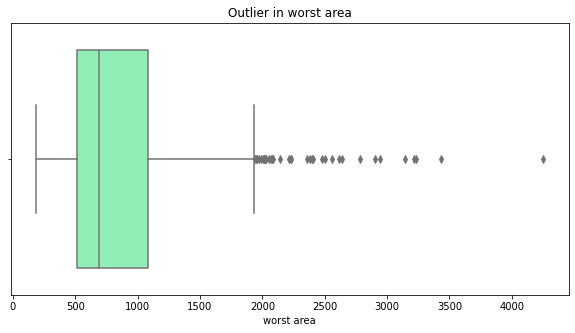

In [311]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
3,11.420,20.38,77.58,386.1,0.1425,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
41,10.950,21.35,71.90,371.1,0.1227,0.12180,0.1044,0.05669,0.1895,0.06870,...,35.34,87.22,514.0,0.19090,0.26980,0.4023,0.1424,0.2964,0.09606,0
192,9.720,18.22,60.73,288.1,0.0695,0.02344,0.0000,0.00000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.0000,0.1909,0.06559,1
203,13.810,23.75,91.56,597.8,0.1323,0.17680,0.1558,0.09176,0.2251,0.07421,...,41.85,128.50,1153.0,0.22260,0.52090,0.4646,0.2013,0.4432,0.10860,0
379,11.080,18.83,73.30,361.6,0.1216,0.21540,0.1689,0.06367,0.2196,0.07950,...,32.82,91.76,508.1,0.21840,0.93790,0.8402,0.2524,0.4154,0.14030,0
504,9.268,12.87,61.49,248.7,0.1634,0.22390,0.0973,0.05252,0.2378,0.09502,...,16.38,69.05,300.2,0.19020,0.34410,0.2099,0.1025,0.3038,0.12520,1
505,9.676,13.14,64.12,272.5,0.1255,0.22040,0.1188,0.07038,0.2057,0.09575,...,18.04,69.47,328.1,0.20060,0.36630,0.2913,0.1075,0.2848,0.13640,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


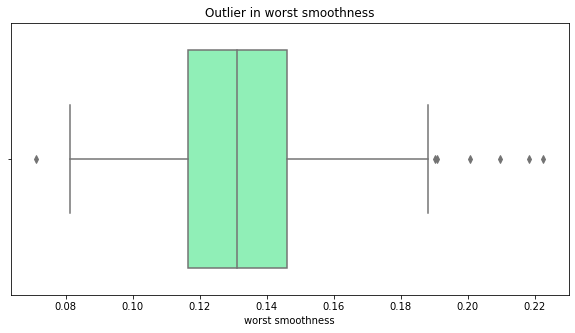

In [312]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
9,12.46,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0
14,13.73,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,0.2069,0.07682,...,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310,0
15,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,0.07077,...,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,0
26,14.58,21.53,97.41,644.8,0.10540,0.1868,0.1425,0.08783,0.2252,0.06924,...,33.21,122.40,896.9,0.1525,0.6643,0.5539,0.2701,0.4264,0.12750,0
33,19.27,26.47,127.90,1162.0,0.09401,0.1719,0.1657,0.07593,0.1853,0.06261,...,30.90,161.40,1813.0,0.1509,0.6590,0.6091,0.1785,0.3672,0.11230,0
42,19.07,24.81,128.30,1104.0,0.09081,0.2190,0.2107,0.09961,0.2310,0.06343,...,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,0
72,17.20,24.52,114.20,929.4,0.10710,0.1830,0.1692,0.07944,0.1927,0.06487,...,33.82,151.60,1681.0,0.1585,0.7394,0.6566,0.1899,0.3313,0.13390,0
108,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


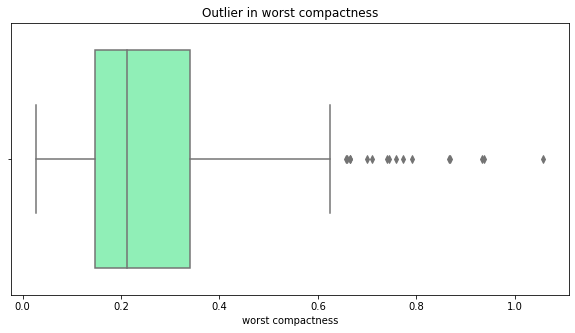

In [313]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
9,12.460,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0
68,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,0.08046,...,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.1750,0.4228,0.11750,1
108,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0
152,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,0.09296,...,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.12590,1
190,14.220,23.12,94.37,609.9,0.10750,0.2413,0.1981,0.06618,0.2384,0.07542,...,37.18,106.40,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460,0
202,23.290,26.67,158.90,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,...,32.68,177.00,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,0
252,19.730,19.82,130.70,1206.0,0.10620,0.1849,0.2417,0.09740,0.1733,0.06697,...,25.59,159.80,1933.0,0.1710,0.5955,0.8489,0.2507,0.2749,0.12970,0
379,11.080,18.83,73.30,361.6,0.12160,0.2154,0.1689,0.06367,0.2196,0.07950,...,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.14030,0
400,17.910,21.02,124.40,994.0,0.12300,0.2576,0.3189,0.11980,0.2113,0.07115,...,27.78,149.60,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980,0
430,14.900,22.53,102.10,685.0,0.09947,0.2225,0.2733,0.09711,0.2041,0.06898,...,27.57,125.40,832.7,0.1419,0.7090,0.9019,0.2475,0.2866,0.11550,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


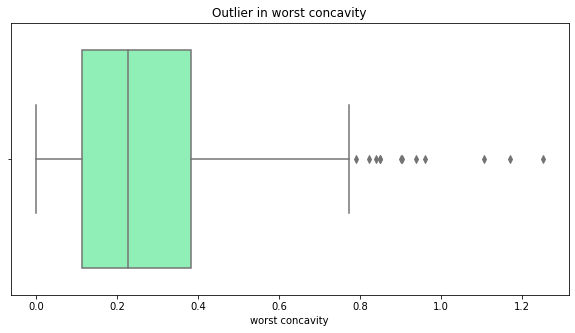

In [314]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


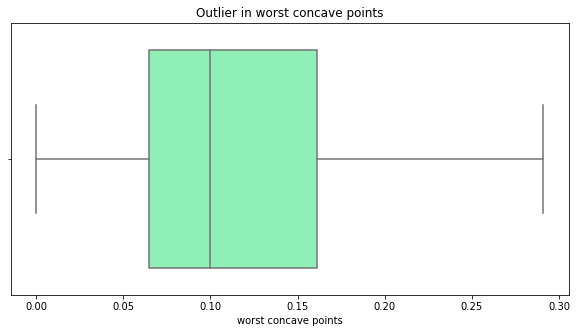

In [315]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0
15,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.13410,0
22,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,...,19.08,125.10,980.9,0.1390,0.5954,0.6305,0.23930,0.4667,0.09946,0
26,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,...,33.21,122.40,896.9,0.1525,0.6643,0.5539,0.27010,0.4264,0.12750,0
31,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,0.07799,...,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.15460,0.4761,0.14020,0
34,16.130,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515,...,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.18640,0.4270,0.12330,0
35,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,29.02,133.50,1229.0,0.1563,0.3835,0.5409,0.18130,0.4863,0.08633,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


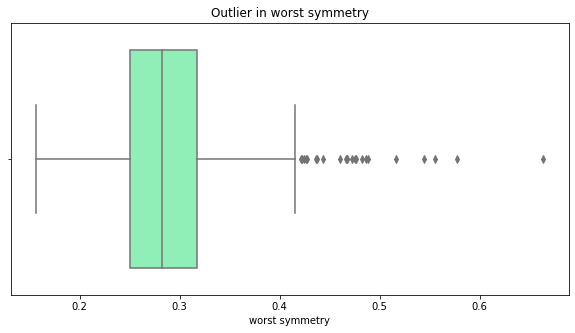

In [316]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
3,11.420,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.1730,0
5,12.450,15.70,82.57,477.1,0.12780,0.1700,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.1244,0
9,12.460,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.2075,0
14,13.730,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,0.2069,0.07682,...,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.1431,0
15,14.540,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,0.07077,...,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.1341,0
26,14.580,21.53,97.41,644.8,0.10540,0.1868,0.1425,0.08783,0.2252,0.06924,...,33.21,122.40,896.9,0.1525,0.6643,0.5539,0.27010,0.4264,0.1275,0
31,11.840,18.70,77.93,440.6,0.11090,0.1516,0.1218,0.05182,0.2301,0.07799,...,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.15460,0.4761,0.1402,0
34,16.130,17.88,107.00,807.2,0.10400,0.1559,0.1354,0.07752,0.1998,0.06515,...,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.18640,0.4270,0.1233,0
72,17.200,24.52,114.20,929.4,0.10710,0.1830,0.1692,0.07944,0.1927,0.06487,...,33.82,151.60,1681.0,0.1585,0.7394,0.6566,0.18990,0.3313,0.1339,0
105,13.110,15.56,87.21,530.2,0.13980,0.1765,0.2071,0.09601,0.1925,0.07692,...,22.40,106.40,827.2,0.1862,0.4099,0.6376,0.19860,0.3147,0.1405,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


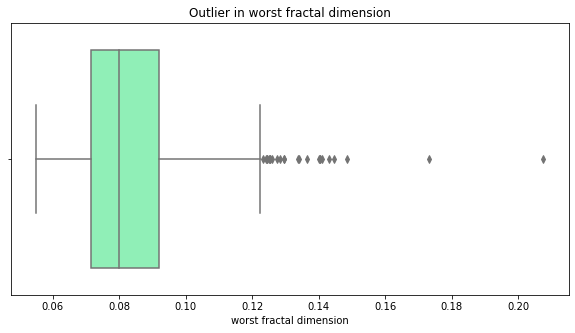

In [317]:
outlier(next(i))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


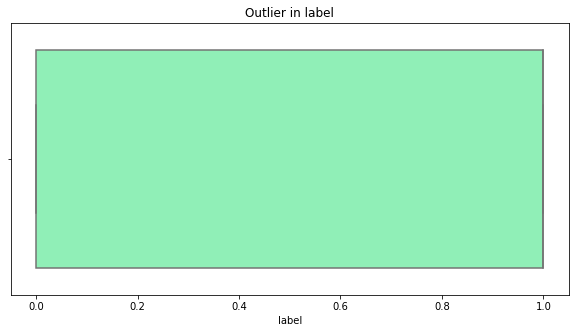

In [318]:
outlier(next(i))

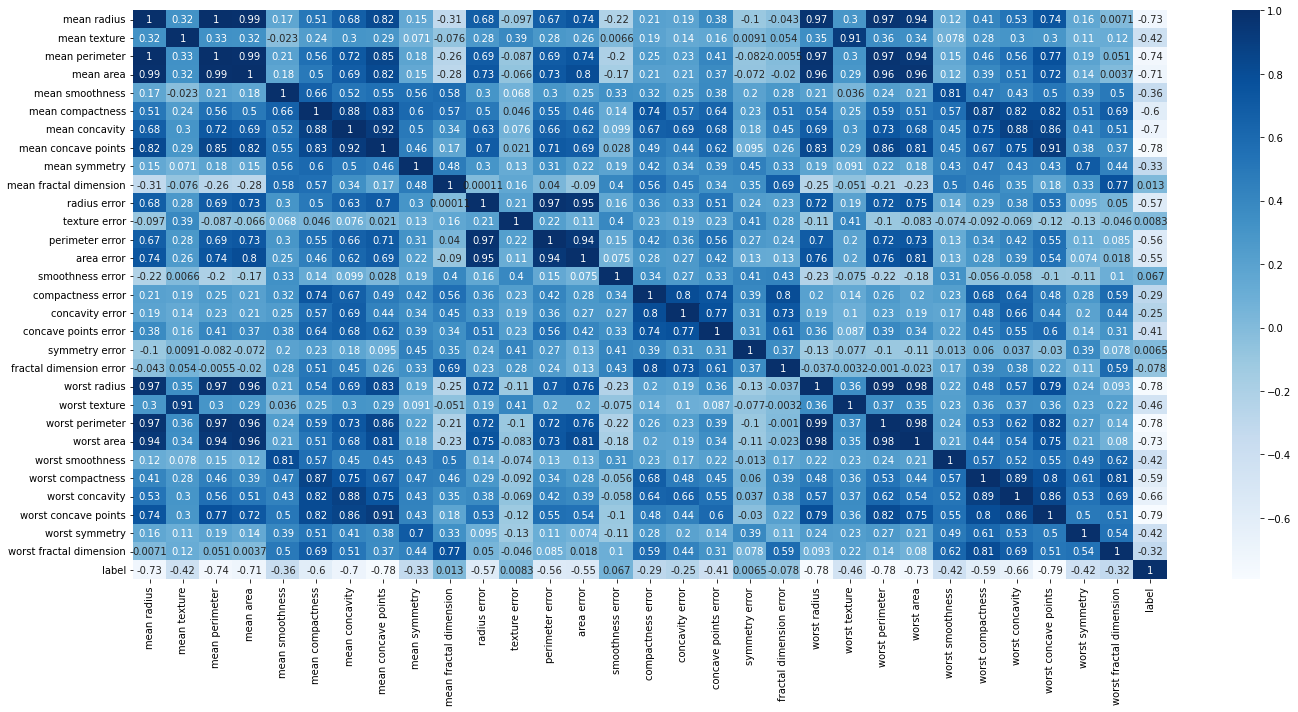

In [319]:
plt.figure(figsize = (20 , 10))

sns.heatmap(data_frame.corr(),annot = True,cmap='Blues')
plt.tight_layout()
plt.show()


In [320]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [321]:

corr_features = correlation(data_frame, 0.90)
len(set(corr_features))

10

In [322]:

corr_features

{'area error',
 'mean area',
 'mean concave points',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst concave points',
 'worst perimeter',
 'worst radius',
 'worst texture'}

In [323]:

data_frame.drop(corr_features,axis=1)

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,label
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,...,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115,0
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,...,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637,0
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,...,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820,0
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,...,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400,0


In [324]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [325]:
X = data_frame.drop('label',1)
y = data_frame['label']

<ipython-input-325-c5b6a6b2a9d2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data_frame.drop('label',1)


In [326]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 121)

In [327]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [328]:


# list of models
models = [RandomForestClassifier(random_state=0)]

In [329]:


def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [330]:


compare_models_cross_validation()

Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.92982456 0.94736842 0.99122807 0.97368421 0.97345133]
Acccuracy score of the  RandomForestClassifier(random_state=0) = 96.31 %
---------------------------------------------------------------


In [331]:
model_hyperparameters = {
    
    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100]
    }
}
     

In [332]:

model_keys = list(model_hyperparameters.keys())
print(model_keys)
     

['random_forest_hyperparameters']


In [333]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe
     

In [334]:


ModelSelection(models, model_hyperparameters)

RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


,model used,highest score,best hyperparameters
0,RandomForestClassifier(random_state=0),0.963111,{'n_estimators': 50}
